# Generalized Linear Models

### Environment Setup
**⚠️Note: If running on a new environment, run this cell once and then restart the kernel⚠️**

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

from numpy.linalg import inv
from scipy import interpolate

%matplotlib inline

### Downloading Files

In [3]:
dandiset_id = "000021"
dandi_filepath = "sub-717038285/sub-717038285_ses-732592105.nwb"
# dandiset_id = "000563"
# dandi_filepath = "sub-688546/sub-688546_ses-1295360519.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [4]:
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.58.1) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Selecting Neurons

In [5]:
spike_times = nwb.units[0].spike_times.item()

### Making Stim Trace

In [6]:
nwb.intervals.keys()

dict_keys(['drifting_gratings_presentations', 'flashes_presentations', 'gabors_presentations', 'invalid_times', 'natural_movie_one_presentations', 'natural_movie_three_presentations', 'natural_scenes_presentations', 'spontaneous_presentations', 'static_gratings_presentations'])

In [7]:
flashes_table = nwb.intervals["flashes_presentations"]
# flashes_table = nwb.intervals["RepeatFFF_presentations"]
flashes_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,color,mask,opacity,phase,size,units,stimulus_index,orientation,spatial_frequency,contrast,tags,timeseries
id,,,,,,,,,,,,,,,,
0,1282.632614,1282.882832,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3647, 1, timestamps pynwb.base.TimeSeries at..."
1,1284.634334,1284.884540,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3648, 1, timestamps pynwb.base.TimeSeries at..."
2,1286.636014,1286.886217,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3649, 1, timestamps pynwb.base.TimeSeries at..."
3,1288.637634,1288.887855,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3650, 1, timestamps pynwb.base.TimeSeries at..."
4,1290.639354,1290.889562,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3651, 1, timestamps pynwb.base.TimeSeries at..."
5,1292.641034,1292.891240,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3652, 1, timestamps pynwb.base.TimeSeries at..."
6,1294.642714,1294.892917,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3653, 1, timestamps pynwb.base.TimeSeries at..."
7,1296.644364,1296.894572,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3654, 1, timestamps pynwb.base.TimeSeries at..."
8,1298.646074,1298.896272,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3655, 1, timestamps pynwb.base.TimeSeries at..."


In [8]:
len(set(flashes_table.color))

2

### Getting Running Times

In [9]:
running_data = nwb.processing["running"]["running_speed"].data
running_timestamps = nwb.processing["running"]["running_speed"].timestamps

### Interpolating Times

In [10]:
first_run_time = running_timestamps[0]
last_run_time = running_timestamps[-1]
first_stim_time = flashes_table.start_time[0]
last_stim_time = flashes_table.stop_time[-1]
first_time = max(first_stim_time, first_run_time)
last_time = min(last_stim_time, last_run_time)

run_start_idx, run_end_idx = np.searchsorted(running_timestamps, [first_time, last_time])
stim_start_idx, stim_end_idx = np.searchsorted(flashes_table.start_time, [first_time, last_time])

running_data_slice = running_data[run_start_idx:run_end_idx]
running_timestamps_slice = running_timestamps[run_start_idx:run_end_idx]

print("first time:", first_time, "last time:", last_time)

first time: 1282.6326142945445 last time: 1581.1321471083802


In [11]:
bin_res = np.mean(np.diff(flashes_table.start_time)) / 3
interp_hz = 1/bin_res
interp_hz

1.4987460323884054

In [12]:
colors = flashes_table.color[stim_start_idx:stim_end_idx]
flash_frames = np.zeros(len(colors))
for i, color in enumerate(colors):
    flash_frames[i] = 1.0 if color == "1.0" else 0

# colors = flashes_table.color[stim_start_idx:stim_end_idx]
# flash_frames = np.zeros(len(colors))
# for i, color in enumerate(colors):
#     flash_frames[i] = float(color)

In [13]:
time_axis = np.arange(first_time, last_time, step=(1/interp_hz))
f = interpolate.interp1d(flashes_table.start_time, flash_frames, axis=0, kind="nearest", fill_value="extrapolate")
interp_flashes = f(time_axis)

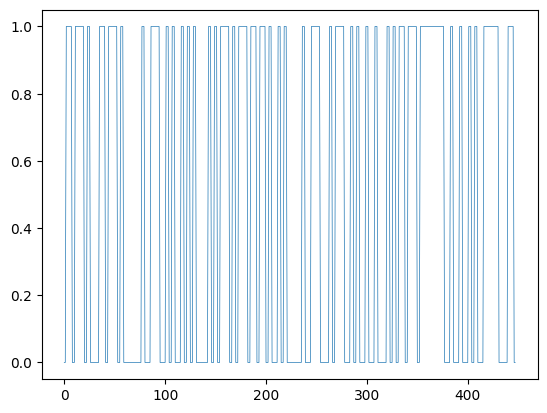

In [14]:
plt.plot(interp_flashes, lw=0.5)

In [15]:
# generate regularly-space x values and interpolate along it
time_axis = np.arange(first_time, last_time, step=(1/interp_hz))
f = interpolate.interp1d(running_timestamps_slice, running_data_slice, axis=0, kind="nearest", fill_value="extrapolate")
interp_running = f(time_axis)

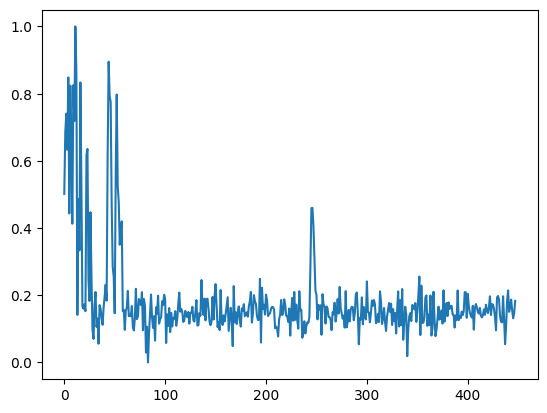

In [16]:
# plt.plot(interp_running)
norm_running = (interp_running-np.min(interp_running)) / (np.max(interp_running)-np.min(interp_running))
plt.plot(norm_running)

In [17]:
print(len(interp_flashes))
print(len(norm_running))

448
448


### Combine Stims

In [18]:
# coefficient to add running to stimulus
mod_coef = 0.25

In [19]:
# exog = interp_flashes * (norm_running * mod_coef)
# plt.plot(exog)

In [20]:
# exog = 0.75*interp_flashes + 0.25*norm_running
# plt.plot(exog)

In [21]:
exog = interp_flashes

### Building Design Matrix

In [22]:
ntfilt = 50

In [23]:
def get_design_mat(ntfilt, stim, num_time_bins):
    padded_stim = np.hstack((np.zeros((ntfilt-1)), stim)) # pad early bins of stimulus with zero
    design_mat = np.zeros((num_time_bins,ntfilt))
    for j in np.arange(num_time_bins):
        design_mat[j] = padded_stim[j:j+ntfilt] # grab last 'nkt' bins of stmiulus and insert into this row
    return design_mat

In [24]:
num_time_bins = len(exog)
design_mat = get_design_mat(ntfilt, exog, num_time_bins)

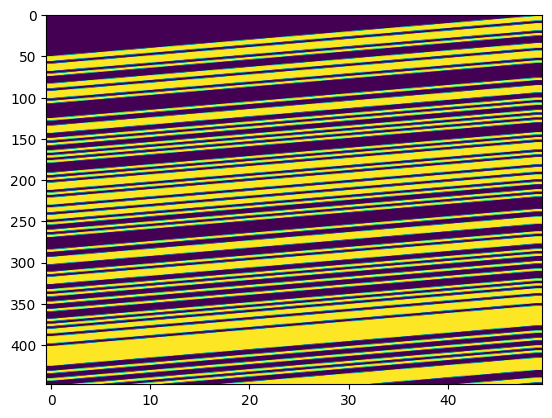

In [25]:
plt.imshow(design_mat, aspect="auto")

### Getting STA

In [26]:
def STA(design_mat, spikes_binned, num_spikes):
    return (design_mat.T @ spikes_binned) / num_spikes

def WSTA(design_mat, spikes_binned, num_spikes):
    sta = STA(design_mat, spikes_binned, num_spikes)
    return inv(design_mat.T @ design_mat) @ sta * num_spikes

In [27]:
num_spikes = len(spike_times)
spikes_bin_centers = np.arange(num_time_bins+1) * interp_hz # centers of bins for applying to spike train
spikes_binned,_ = np.histogram(spike_times, spikes_bin_centers)

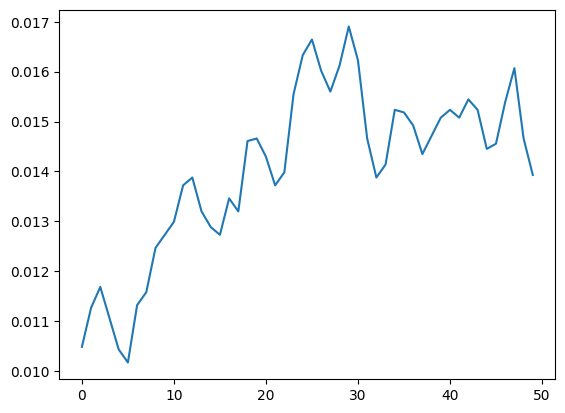

In [28]:
plt.plot(STA(design_mat, spikes_binned, num_spikes))

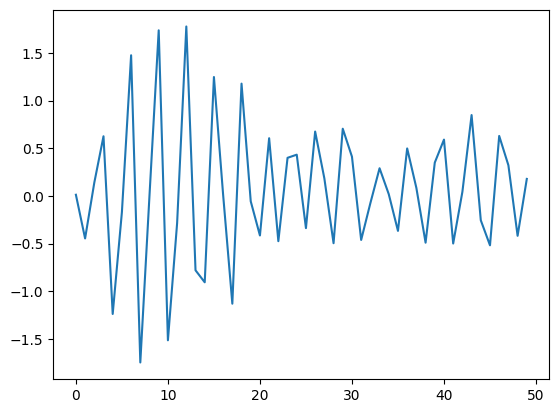

In [29]:
plt.plot(WSTA(design_mat, spikes_binned, num_spikes))

### Running MLE

In [30]:
def MLE(design_mat, spikes_binned):
    design_mat_offset = np.hstack((np.ones((design_mat.shape[0],1)), design_mat)) # just add a column of ones

    glm_poisson_exp = sm.GLM(endog=spikes_binned, exog=design_mat_offset,
                            family=sm.families.Poisson())

    pGLM_results = glm_poisson_exp.fit(max_iter=100, tol=1e-6, tol_criterion='params')

    # pGLM_const = glm_poisson_exp[-1].fit_['beta0'] # constant ("dc term)")
    pGLM_const = pGLM_results.params[0]
    pGLM_filt = pGLM_results.params[1:] # stimulus filter

    return pGLM_filt, pGLM_const

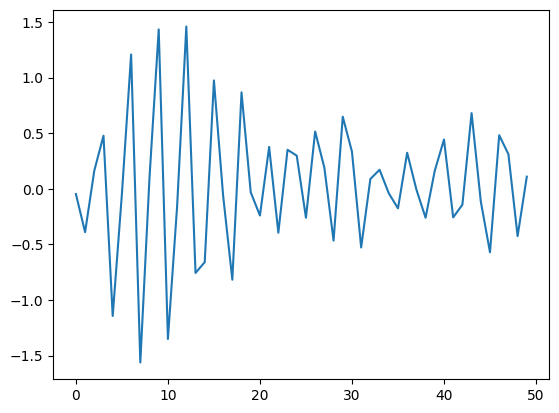

In [ ]:
filt, const = MLE(design_mat, spikes_binned)
plt.plot(filt)

### running on many cells

In [ ]:
def get_filter(spike_times, method="poisson"):
    these_spikes_bin_centers = np.arange(num_time_bins+1) * interp_hz # centers of bins for applying to spike train
    these_spikes_binned,_ = np.histogram(spike_times, these_spikes_bin_centers)

    print(len(spike_times))

    if method == "poisson":
        return MLE(design_mat, these_spikes_binned)
    elif method == "sta":
        return STA(design_mat, these_spikes_binned, num_spikes), 0
    elif method == "wsta":
        return WSTA(design_mat, these_spikes_binned, num_spikes), 0

In [ ]:
filters = []
for i in range(1000):
    try:
        if nwb.units[i].quality.item() == "good":
            print(i)
            filter, const = get_filter(nwb.units[i].spike_times.item())
            filters.append(filter)
    except:
        continue

0
19167
1
54029
2
18905
3
44339


4
20540
5
58866
6
158831
7
83


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

8
19246
9
4679
10
48611
11
152609
12
56734
13
558
14
3466
15
13
16
45937
17
236
18
2940
19
18756
20
17481
21
46140
22
1912


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


23
2308
24
40692
25
33078
26
10227
27
39899
28
59805
29
137977
30
56470
31
995
32
15223
33
124426
34
134785
35
353
36
6146
37
15482
38
78548
39
97823
40
33855
42
83601
43
17813
44
35219
45
64737
46
38922
47
2230
48
190
49
48800
50
39773
51
368
52
434
53
1078
54
20176
55
13440
56
22006
57
3188
58
33034
59
9015
60
8711
61
9393
62
66418
63
29754
64
31124
65
35718
66
27698
67
210
68
65500
69
33432
70
95365
71
8549
72
5897
73
76099
74
66870
75
14873
76
102323
77
113259
78
31123
79
60666
80
127896
81
15510
82
16362
83
1954
84
6925
85
30378
86
16047
87
3417
88
1905
89
18204
90
12515
91
20467
92
23954
93
62574
94
18903
95
12662
96
58142
97
43127
98
2482
99
19586
100
27973
101
12167
102
4501
103
15958
104
53586
105
88672
106
83575
107
76227
109
15186
110
36374
111
1651
112
98767
113
20055
114
4179
115
76828
116
8983
117
14779
118
29944
119
5159
123
4491
124
66364
125
89564
126
145032
127
2190
128
302
129
1556
132
81257
133
12840
134
20136
135
15161
136
64113
137
665462
138
1962
139
209
140
29


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

141
80
142
1690
143
16642
144
1804
145
575
146
317
148
30164
149
681
150
30162
151
36646
152
131504
153
589
154
48744
155
8643
156
117693
157
45069
158
27472
159
25021
160
16479
162
99989
163
121278
164
59384
165
98567
166
123037
167
26919
168
1978
169
17382
170
16940
171
7918
173
6614
174
47702
175
67182
176
99445
177
80393
178
106641
179
48014
180
59747
181
37013
182
10563
183
43818
184
4135
185
143885
186
35678
187
224122
188
148235
189
121048
190
80179
191
4957
192
1181
193
80007
194
97585
195
16916
196
72744
197
138108
198
65106
199
2367
200
73817
201
21424
202
8327
203
46964
204
353
205
268
206
364
207
444
208
3688
209
15250
210
576
211
59679
212
9231
213
12543
214
385
215
731
217
60750
218
11772
219
48563
220
2652
221
2307
222
8059
223
22666
224
5931
225
760
226
6497
227
39248
228
10666
229
1161
230
53596
231
126133
232
71057
233
48267
234
6049
235
24151
236
35458
237
32727
238
14614
239
26768
240
24070
244
4782
246
11600
247
25265
248
24130
249
72630
250
58195
251
48664
252
346

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

485
5088
486
164
487
258
488
24148
489
53
490
3057
491
36905
492
214889
493
4164
494
51954
495
73458
496
90725
497
88
498
38237
501
55166
502
41


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

503
10540
504
84524
505
29610
506
129179
509
7154
510
252
511
24204
512
1699
513
5526
514
27329
515
176045
516
27928
517
15419
518
2925
519
91133
520
19798
521
110576
522
38036
523
3847
524
24
525
7270
526
6897
527
12402
528
7825
529
157368
530
94199
531
20097
532
169692
533
88264
534
62040
535
41503
536
203704
540
152100
541
41326
542
10497
543
27734
544
9835
545
7683
546
155072
547
75598
548
266997
549
3330
550
10956
552
282
554
602
555
19780
556
100640
557
27500
558
5456
559
49119
560
14754
561
8399
562
28544
563
17294
564
35242
565
121844
566
262337
567
36823
568
458062
569
95020
570
67143
571
7631
572
21723
573
144145
574
40162
575
242151
576
207673
577
62172
578
35776
579
85261
580
41429
581
1622
582
306322
583
178694
584
61943
585
64695
587
60120
588
140602
589
120775
590
12776
591
108243
592
110566
593
421
594
26440
595
22392
596
111478
597
124949
598
414693
599
7210
600
101914
601
5510
602
36399
603
159947
605
75266
606
7204
607
36157
608
23050
609
26014
610
56476
611
15476
61

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

624
22003
625
149623
626
124711
627
220506
628
23924
629
8672
630
22778
631
8237
632
70569
633
104054
634
1636
635
35293
636
53085
637
100578
638
191501
641
95590
642
2551
643
71756
644
14177
645
23949
646
104289
647
49436
648
8787
649
81116
650
105687
652
67518
653
555490
654
105708
655
107353
656
17817
657
315770
658
50377
659
107913
660
22212
662
109529
663
136904
664
157000
665
92700
666
72421
667
29331
668
4450
669
113900
670
14376
671
4811
672
918
673
1084
674
6131
675
6274
676
157931
677
83562
678
21702
679
77672
680
60
681
63675
682
77
683
36014
684
16966
685
53366
686
92842
687
21314
688
65196
689
13071
690
141377
691
9918
692
64175
693
20127
694
17724
695
87333
696
8655
697
50250
698
75035
699
96404
700
28256
701
64542
702
69336
703
119654
704
26937
705
117225
706
34284
707
1402
708
97177
709
105377
710
1080
711
1322
712
9384
713
37355
714
12231
716
1585
717
353
718
370
719
14174
720
71181
721
77672
722
18


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

723
25014
724
24557
725
28709
726
33279
727
61937
728
341
729
216
730
13610
731
14
732
3652
733
17202
735
117589
736
112693
737
110359
738
2314
739
105036
740
59198
741
102087
742
9623
743
22036
744
3261
746
58214
747
103370
748
37762
749
10273
750
108823
751
165723
752
84526
753
33289
754
50
755
27765
756
36
757
27395
758
1640
759
27989
761
127819
762
2220
763
7306
764
7539
765
190475
766
25818
767
22947
768
6227
769
437
770
1951
771
10166
772
50596
773
111959
774
100992
775
38981
776
61547
777
79576
778
102610
779
14785
780
6731
781
11263
782
17445
783
24565
784
34559
785
9211
786
17899
787
218
788
90304
789
131901
790
12120
791
30893
792
16265
793
253686
794
79037
795
84499
796
129406
797
125034
798
7156
799
3364
800
280
801
103247
802
50
803
1657
804
42868
805
3879
806
5120
807
9228
808
17709
809
5972
810
19121
811
24645
812
3268
813
30092
814
51283
815
74247
816
1957
819
9599
820
4939
821
40365
822
47620
823
50449
825
31749
826
103407
827
636
828
52564
829
23044
830
697
831
4419
8

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

874
218
875
139
876
4699
877
542
878
1131
880
179
881
318
882
224
884
5078


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

885
18779
886
1267
887
47824
888
74649
889
1560
890
111625
891
133356
892
25759
895
21108
897
41970
898
102
899
77
900
10051
901
46412
902
32394
903
13567
904
14768
905
72511
906
70769
908
57745
909
37650
910
73772
911
148066
912
52424
913
52883
914
64031
915
60307
916
111226
917
11313
918
11659
919
1242
920
23146
921
8002
922
30894
923
11526
924
104302
925
3824
926
675
927
193
928
94475
929
29842
930
88536
931
28033
932
113048
933
31546
934
8092
935
33073
936
80612
937
26678
938
17654
939
10496
940
167313
941
5436
942
13519
943
34395
944
51714
945
135660
946
6526
947
100635
948
98005
949
214121
950
691
951
46
952
163034
953
53991
954
13107
955
29445
956
121661
957
57276
958
46461
959
53811
961
64460
962
114463
963
2839
964
87572
965
107020
966
131796
967
50398
968
28740
969
93316
970
15170
971
73367
972
106995
973
57225
974
5324
975
2389
976
98710
978
112059
979
3920
980
187769
981
34126
982
6464
983
2104


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: P

984
24317
985
18599
986
390972
987
5250
988
27445
989
76421
990
70666
991
3336
992
17399
993
49109
994
119364
996
13727
997
8769
998
18946
999
8089


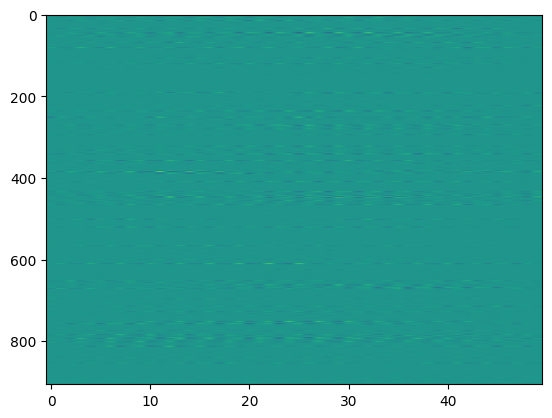

In [ ]:
plt.imshow(np.array(filters), aspect="auto")

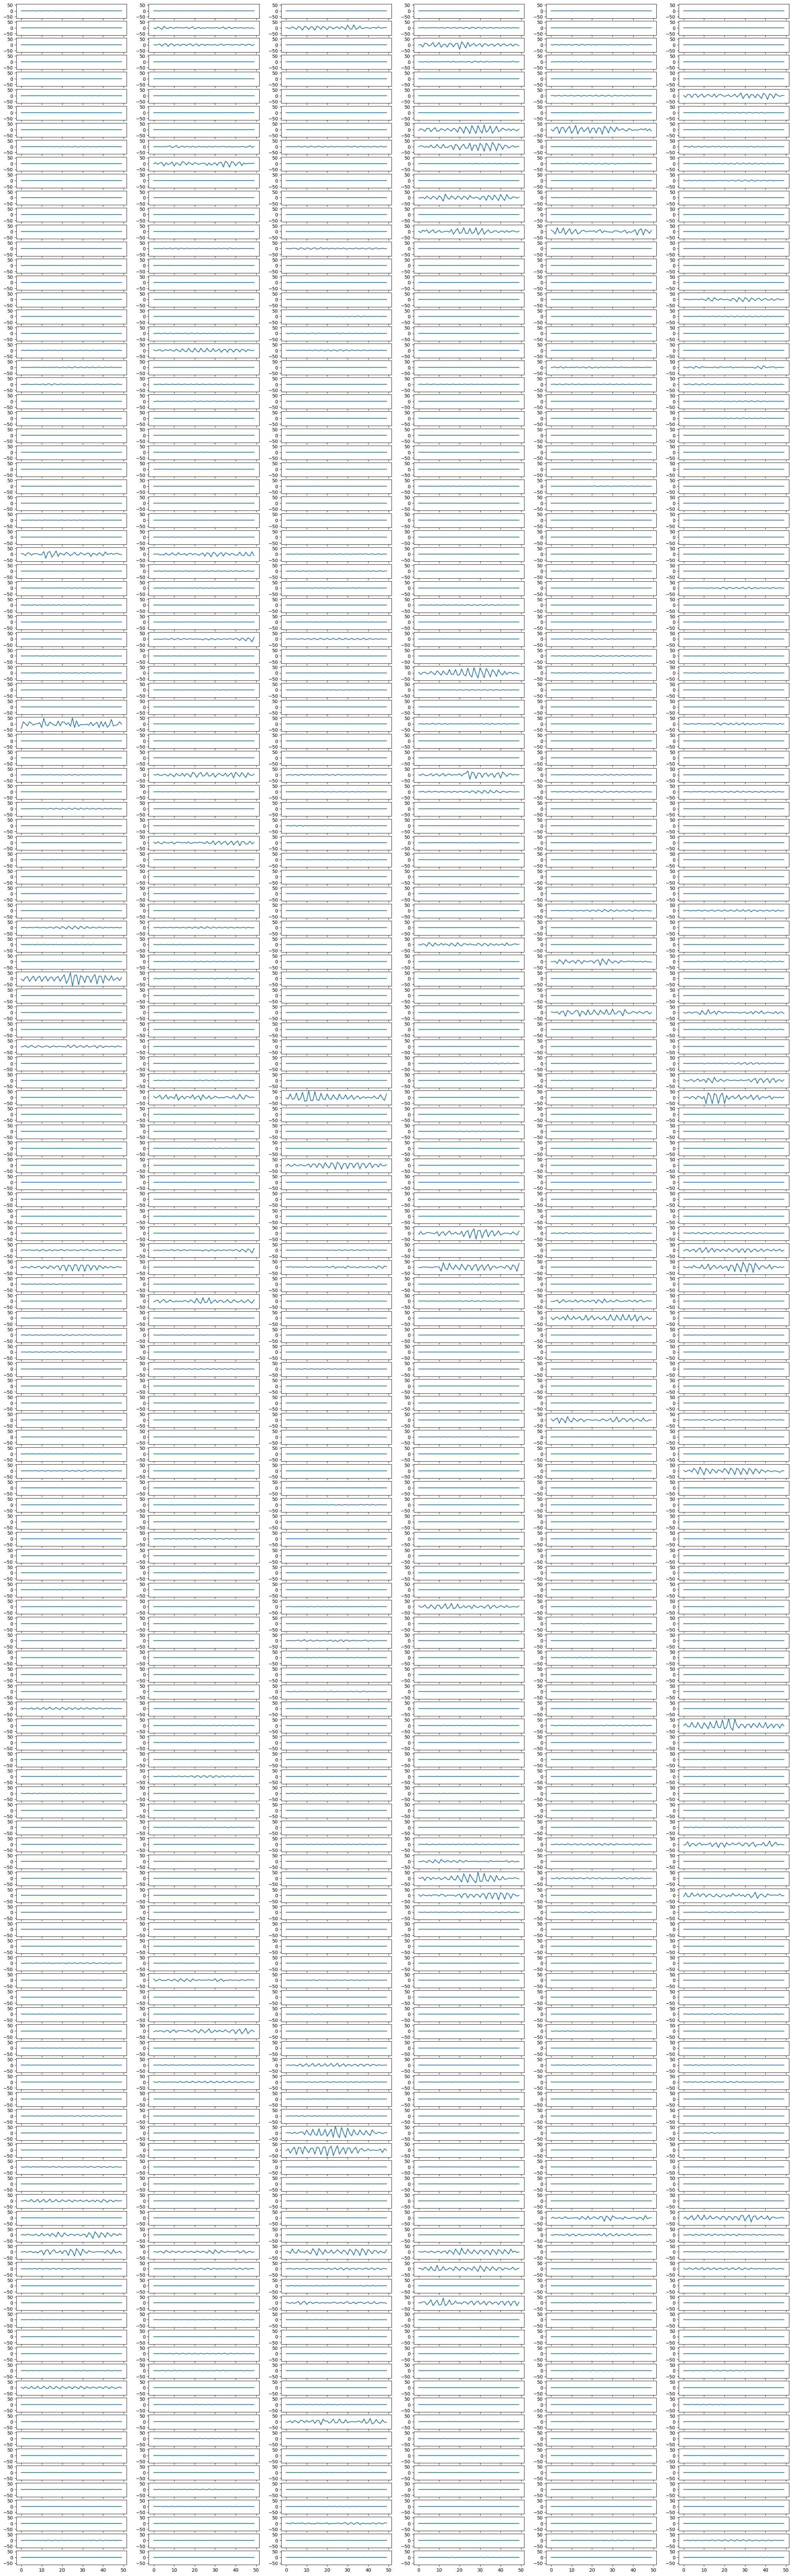

In [ ]:
ymax, ymin = 0, 0
for i in range(len(filters)):
    filter = filters[i]
    if max(filter) > ymax:
        ymax = max(filter)
    if min(filter) < ymin:
        ymin = min(filter)

ncols=6

fig, axes = plt.subplots(len(filters)//ncols, ncols, figsize=(30,100))
for i in range(len(axes.flatten())):
    filter = filters[i]
    row = i // ncols
    col = i % ncols
    axes[row][col].plot(filter)
    axes[row][col].set_ylim([ymin, ymax])

### Attempting usage